In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import json

In [2]:
#run_modeを選択 "regular" or "kfold"
run_mode = "kfold"

#datanameを選択
data_name = "CH_data"

#変えた値を選択:"dropout" or "seed"
change_name_dir = "dropout"

#optionを選択:dropout -> ["wide" or "detail"], seed -> "seed"
change_name = "wide"

#failを開く
with open(f'result/{change_name_dir}/{data_name}_{change_name}_{run_mode}_log.txt', 'r') as f:
    data = json.load(f)

data

{'0.0_mae': 0.1817922294139862,
 '0.0_rmse': 0.23497740100439948,
 '0.2_mae': 0.18253953754901886,
 '0.2_rmse': 0.2385204006208025,
 '0.4_mae': 0.1912214308977127,
 '0.4_rmse': 0.25451876778904287,
 '0.6_mae': 0.22940701246261597,
 '0.6_rmse': 0.29689279302180177,
 '0.8_mae': 0.49438610672950745,
 '0.8_rmse': 0.6009508466503077}

In [3]:
if change_name == "wide":
    index = [0.0, 0.2, 0.4, 0.6, 0.8]
elif change_name == "detail":
    index = [0.3, 0.34, 0.38, 0.42, 0.46]
elif change_name == "seed":
    index = [42+i for i in range(10)]

if run_mode == "regular":
    columns = ['train_mae', 'train_rmse', 'test_mae', 'test_rmse']
elif run_mode == "kfold":
    columns = ["MAE", "RMSE"]

data = {c: [data[f'{i}_{c.lower()}'] for i in index] for c in columns}
df = pd.DataFrame(data, index=index)

print(df)
#columnsとindexを入れ替える
df = df.T

          MAE      RMSE
0.0  0.181792  0.234977
0.2  0.182540  0.238520
0.4  0.191221  0.254519
0.6  0.229407  0.296893
0.8  0.494386  0.600951


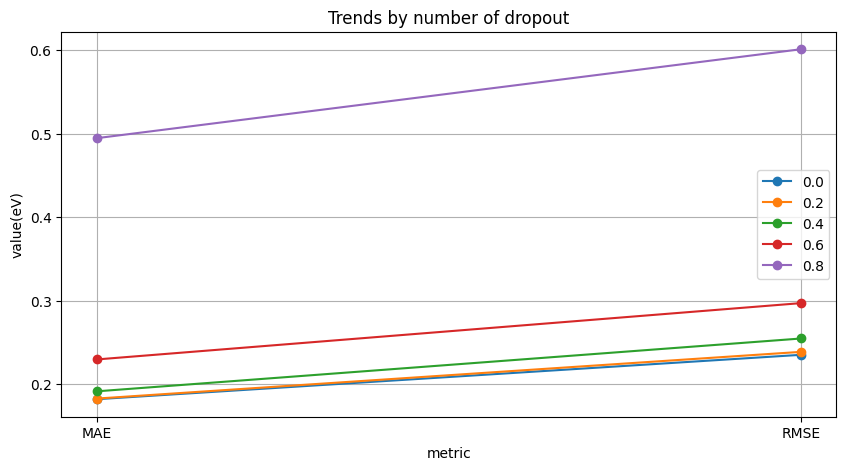

In [4]:
# グラフをプロット
plt.figure(figsize=(10, 5))
for column in df.columns:
    plt.plot(df.index, df[column], marker='o', label=column)
plt.legend()
plt.xlabel('metric')
plt.ylabel('value(eV)')
plt.title(f'Trends by number of {change_name_dir}')
plt.grid(True)
plt.savefig(f"resultplot/comparison_{change_name_dir}_{change_name}.png")
plt.show()


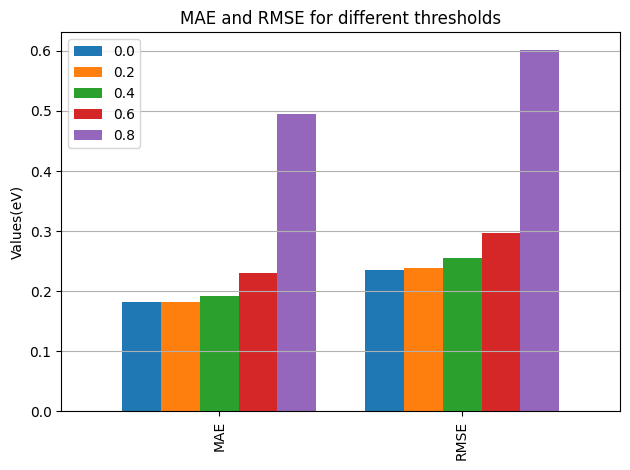

In [8]:
# 棒グラフを描画
df.plot(kind='bar', width=0.8)

# 軸のラベルを設定
# plt.xlabel('Threshold')
plt.ylabel('Values(eV)')
plt.title('MAE and RMSE for different thresholds')

# 凡例を表示
plt.legend()

# グラフを表示
plt.grid(axis='y')
plt.tight_layout()
plt.show()